<a href="https://colab.research.google.com/github/dariamm03/Machine_Learning/blob/main/MachineLearning10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Задание:
1) Решить задачу с идентификацией краж в магазинах или альтернативные варианты следующими методами: k-NN, SVM, Naive Bayes, деревья решений и провести оценку качества.  
2) Выполнить кроссвалидацию и сравнить качество получаемых результатов с результатами, полученными на предыдущем этапе.  
3) Построить композицию (ансамбль) моделей и сравнить качество модели с предыдущими результатами.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

In [ ]:
import pandas as pd

data = pd.read_csv("DataSet2_1.csv", sep='|')
data.head(8)

,trustLevel,totalScanTimeInSeconds,grandTotal,lineItemVoids,scansWithoutRegistration,quantityModifications,scannedLineItemsPerSecond,valuePerSecond,lineItemVoidsPerPosition,fraud
0,5,1054,54.70,7,0,3,0.027514,0.051898,0.241379,0
1,3,108,27.36,5,2,4,0.129630,0.253333,0.357143,0
2,3,1516,62.16,3,10,5,0.008575,0.041003,0.230769,0
3,6,1791,92.31,8,4,4,0.016192,0.051541,0.275862,0
4,5,430,81.53,3,7,2,0.062791,0.189605,0.111111,0
5,1,770,11.09,11,5,2,0.033766,0.014403,0.423077,1
6,3,294,55.63,2,7,1,0.037415,0.189218,0.181818,0
7,2,1545,22.80,0,8,4,0.006472,0.014757,0.000000,0


In [ ]:
# разбиваем данные на тренировочную и тестовую выборку
X = data.drop(columns=['fraud'])
y = data['fraud']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [ ]:
svm_model = SVC(probability=True, kernel="linear")
svm_model.fit(x_train, y_train)
res_svm = svm_model.predict(x_test)
auc_svm = roc_auc_score(y_test, res_svm)
auc_svm = roc_auc_score(y_test, res_svm)
print("auc_roc", auc_svm)

auc_roc 0.7692307692307692


In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(x_train, y_train)
res_knn = knn_model.predict(x_test)
auc_knn = roc_auc_score(y_test, res_knn)
print("auc_roc", auc_knn)

auc_roc 0.49714285714285716


In [ ]:
nb_model = GaussianNB()
nb_model.fit(x_train, y_train)
res_nb = nb_model.predict(x_test)
auc_nb = roc_auc_score(y_test, res_nb)
print("auc_roc", auc_nb)

auc_roc 0.9185714285714286


In [ ]:
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train, y_train)
res_dt = dt_model.predict(x_test)
auc_dt = roc_auc_score(y_test, res_dt)
print("auc_roc", auc_dt)

auc_roc 0.762087912087912


In [ ]:
# Вычисление ROC-кривых
fpr_svm, tpr_svm, _ = roc_curve(y_test, res_svm)
fpr_knn, tpr_knn, _ = roc_curve(y_test, res_knn)
fpr_nb, tpr_nb, _ = roc_curve(y_test, res_nb)
fpr_dt, tpr_dt, _ = roc_curve(y_test, res_dt)

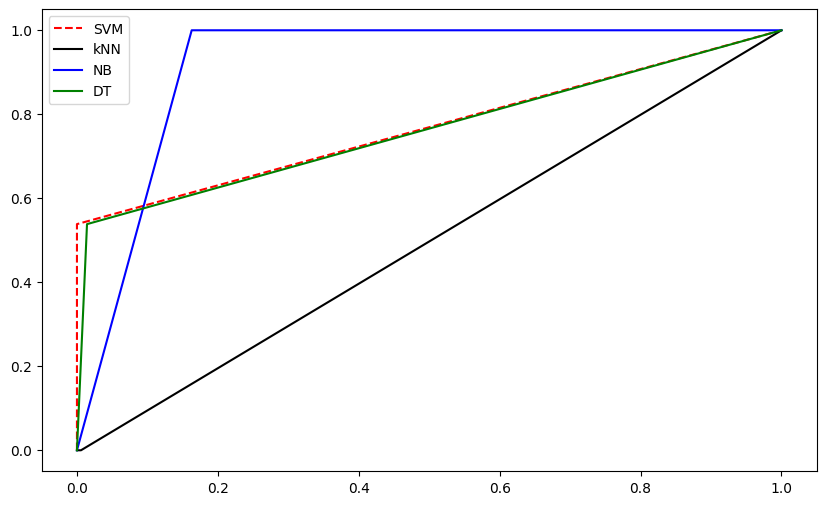

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(fpr_svm, tpr_svm, color='red', linestyle='dashed', label='SVM')
ax.plot(fpr_knn, tpr_knn, color='black', linestyle='solid', label='kNN')
ax.plot(fpr_nb, tpr_nb, color='blue', linestyle='solid', label='NB')
ax.plot(fpr_dt, tpr_dt, color='green', linestyle='solid', label='DT')
ax.legend()

это когда набор данных случайным образом разбивается на группы k раз. Одна из групп используется в качестве тестового набора, а остальные — в качестве обучающего набора. Модель обучается на обучающем наборе и оценивается на тестовом наборе. Затем процесс повторяется до тех пор, пока каждая уникальная группа не будет использоваться в качестве тестового набора.

In [ ]:
from sklearn.model_selection import cross_validate
import numpy as np

In [ ]:
svm_model_cv = SVC(probability=True, kernel="linear")
svm_cv_scores = cross_val_score(svm_model_cv, X, y, cv=5)
print(f'SVM cv_scores mean:{np.mean(svm_cv_scores)}')

SVM cv_scores mean:0.9707304964539007


In [ ]:
knn_model_cv = KNeighborsClassifier(n_neighbors=3)
knn_cv_scores = cross_val_score(knn_model_cv, X, y, cv=5)
print(f'kNN cv_scores mean:{np.mean(knn_cv_scores)}')

kNN cv_scores mean:0.9324156028368794


In [ ]:
nb_model_cv = GaussianNB()
nb_cv_scores = cross_val_score(nb_model_cv, X, y, cv=5)
print(f'Naive Bayes cv_scores mean:{np.mean(nb_cv_scores)}')

Naive Bayes cv_scores mean:0.8355560283687945


In [ ]:
dt_model_cv = DecisionTreeClassifier()
dt_cv_scores = cross_val_score(dt_model_cv, X, y, cv=5)
print(f'Decision tree cv_scores mean:{np.mean(dt_cv_scores)}')

Decision tree cv_scores mean:0.9680666666666667


In [ ]:
from sklearn.ensemble import VotingClassifier
p = VotingClassifier(estimators=[('SVC', SVC(probability=True, kernel="linear")), ('NB', GaussianNB()), ('DT', DecisionTreeClassifier())], voting='soft')
p.fit(x_train, y_train)
res = p.predict(x_test)
print('auc_res', roc_auc_score(y_test, res))

auc_res 0.9173626373626375


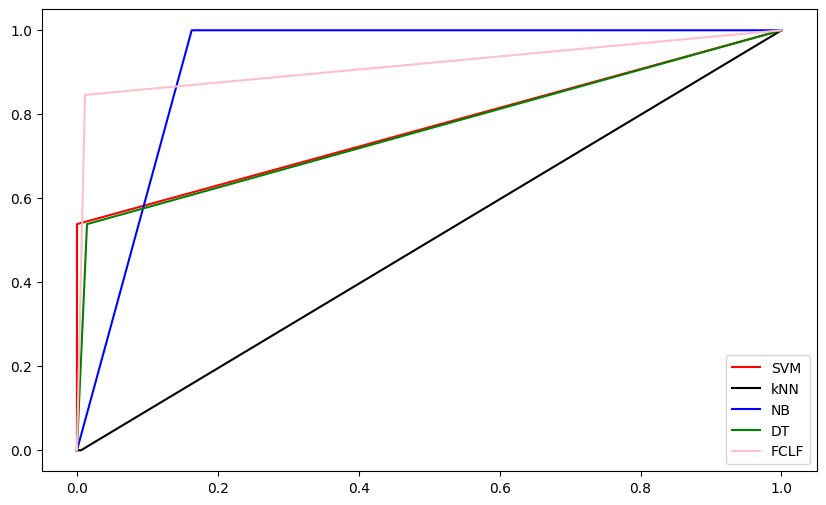

In [ ]:
fpr_p, tpr_p, _ = roc_curve(y_test, res)

fig, ax = plt.subplots(figsize=(10,6))
ax.plot(fpr_svm, tpr_svm, color='red', linestyle='solid', label='SVM')
ax.plot(fpr_knn, tpr_knn, color='black', linestyle='solid', label='kNN')
ax.plot(fpr_nb, tpr_nb, color='blue', linestyle='solid', label='NB')
ax.plot(fpr_dt, tpr_dt, color='green', linestyle='solid', label='DT')
ax.plot(fpr_p, tpr_p, color='pink', linestyle='solid', label='FCLF')
ax.legend()

In [ ]:
from sklearn.ensemble import StackingClassifier

estimators = [
    ('svm', SVC(probability=True, kernel="linear")),
    ('nb', GaussianNB()),
    ('dt', DecisionTreeClassifier())
]
stacking_model = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
stacking_model.fit(x_train, y_train)
res_stacking = stacking_model.predict(x_test)

stacking_acc = accuracy_score(y_test, res_stacking)
fpr_stacking, tpr_stacking, _ = roc_curve(y_test, res_stacking)

print('Доля правильных ответов для ансамбля моделей:', stacking_acc)

Доля правильных ответов для ансамбля моделей: 0.9707446808510638


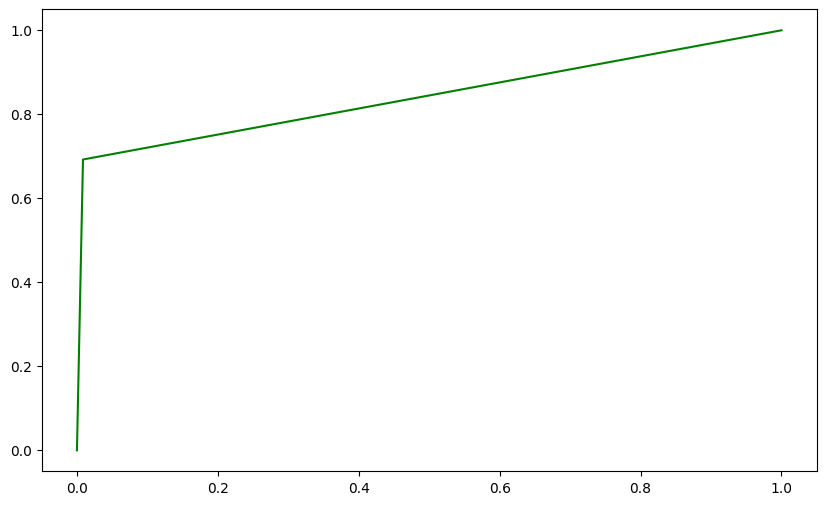

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(fpr_stacking, tpr_stacking, color='green', linestyle='solid')